# What are $\mu$ and $\sigma$ in the Standardization formula in a Normal distribution?
Why do we somtimes have $$Z = \frac{X-\mu}{\sigma}$$ and othertimes have $$Z = \frac{Y-\mu}{\sigma/\sqrt{n}}$$? Where does the $n$ come from, and when do we use $\sigma$ or $\sigma/\sqrt{n}$?

This experiment is designed to answer that question.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Let's say there is a population of 1 million-ish people whose ages are between 20-70.
Note that the original probability distribution of r.v. $X$ doesn't have to be a normal distribution in order to make the $\bar{X}$ to be normally distributed. 
No matter which distribution the $X$ had, $\bar{X}$ will follow normali distribution given enough sample size- this is CLT.
Here, however, we're interested to compare the relationship between the $\mu$ and $\sigma$ of two random variables $X$ and $\bar{X}$, where $X$ and $\bar{X}$ follow normal distributions, especially check where the $n$ comes from in the $\sigma/\sqrt{n}$. Therefore, I shall make the $X$ to be normally distributed.

In [5]:
#Each element value (the age of a person) in this array Xpop (the popuation) is a random variable X.
Xpop =  np.random.normal(loc=45, scale=10, size=1000000)  

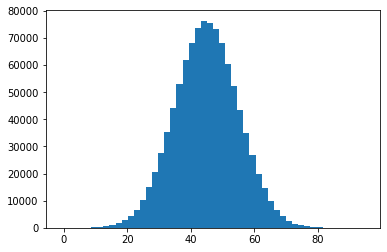

In [8]:
plt.hist(Xpop, bins=50);

In [16]:
Xpop = Xpop[(Xpop>=20)&(Xpop<=70)] # remove the ages that are out of range [20,70]

In [17]:
Xpop.shape[0]

987728

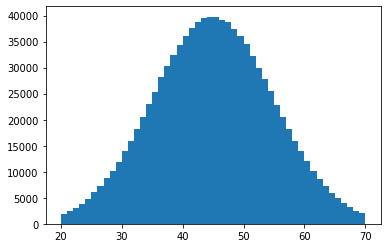

In [18]:
plt.hist(Xpop, bins=50);

In [23]:
# What is the mean of the ages of people in the entire population?
Xpop.mean()

44.99033394970213

In [24]:
# What is the standard deviation of the ages of people in the entire population?
Xpop.std()

9.542375725075212

In [13]:
def samples(n,m,X):
    """
    Returns a list of average age in a group.  
    n: number of people in one group
    m: number of groups
    """
    Xbar = np.array([np.mean(np.random.choice(X, size=n)) for _ in range(m)])
    return Xbar

In [19]:
Xbar = samples(100, 1000, Xpop)
# Interpretation: We draw 1000 groups, each of which consist of 100 people.
# Each element in the Xbar array represent the average age of the each group

In [15]:
Xbar.shape

(1000,)

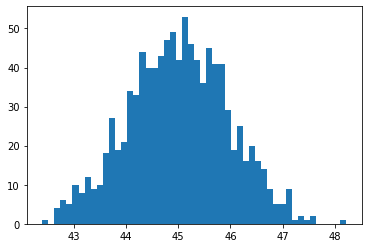

In [20]:
# Let's look the distribution of the average age of the group
plt.hist(Xbar, bins=50); 

In [21]:
# What is the mean of the Xbar (the mean of the average age in a group)?
Xbar.mean()

45.00289855974956

In [22]:
# What is the standard deviation of the Xbar (the standard deviation of the average age in a group)?
Xbar.std()

0.9551099385840024

In [26]:
print(Xpop.var(), Xbar.var())

91.05693447850469 0.9122349947819368


In [27]:
# What is the relationship between the E[X] vs. E[Xbar], and Var[X] vs. Var[Xbar]? 
# Copied from the above results:
# E[X] : mean age of the entire population- 44.99
# E[Xbar] : mean of "the average age of each group", where each group has 100 people - 45.00
# Var[X] = 91
# Var[Xbar] = 1
# We can conclude that 1) E[X]~E[Xbar] and Var[X]~ N * Var[Xbar], where N is the number of people in a group. (n=100)

In the z-statistics, the standardization of a random variable $\bar{x}$ uses formula $$\frac{\bar{X}-\mu}{\sigma/\sqrt(n)}$$, we can now see that the $\sigma/\sqrt{n}$ is the standard deviation of the r.v. $\bar{X}$ (sample mean = average age of each sample group), and the $\sigma$ is the standard deviation of the age in the entire population, while $\mu = E[X] = E[\bar{X}]$.

Note that we had two kinds of numbers: 
- n (or N): sample size = number of people in each group (a group can be thought of one sampling)
- m : how many samplings or experiments we did to run the statistics for $\bar{X}$ = number of groups

As you can see, what matters in the variance of $\bar{X}$ is the n, not m.
You can try changing n and/or m and see what happens.

In summary, a standardization of a random variable Y is $$\frac{Y-E[Y]}{\sqrt{Var[Y]}}$$.
In case the Y follows a normal distribution, we can rewrite it as $$\frac{Y-\mu_Y}{\sigma_Y}$$.
Furthermore, in case Y is a mean of another random variable $X$ (i.e., $Y=\bar{X}$), then, $\mu_Y = \mu_{\bar{X}} = \mu_X$, and $\sigma_Y = \sigma_{\bar{X}} = \sigma_X/\sqrt{n}$, therefore, 
$$\frac{\bar{X}-\mu}{\sigma/\sqrt(n)}$$,
where $\mu = \mu_X$ and $\sigma = \sigma_X$ as in above formula.

### Conclusion:
1. Any random variable $X$ that follows a normal distribution $N(\mu, \sigma)$ can be standardized to follow $N(0,1)$. To do that we can transform to $Z$ by 
$$ Z = \frac{X-\mu}{\sigma}$$, where $\mu = E[X]$ and $\sigma = \sqrt{Var[X]}$.
2. If a random variable $Y$ is happen to be a mean of another random variable $X$, then use $\sigma_Y = \sqrt{Var[Y]} = \sqrt{Var[X]/n} = \sigma_X/\sqrt{n}$, where n is the sample size for the averaging.